**Analysis owner**: Felipe Matheus <br>
**Date**: 12/10/2021 <br>
**Related Links**:

The objective of this notebook is to asses data from Jeff and create a DataFrame modeling the problem.

# Setup

Libs

In [1]:
import os
import sys
import json
import pandas as pd
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
#import warnings

%load_ext autoreload
%autoreload 2

Modules

In [54]:
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.DataLoader import DataLoader
from src.processing.Processing import Processing
from src.visualization.Plots import Plots
from src.utils import read_files

Variables

In [3]:
pd.options.display.max_rows = 6
# warnings.filterwarnings("ignore")
with open('../config/variables.json') as json_file:
    var = json.load(json_file)
RAW_DATA = var.get('RAW_DATA')
TRAIN_FOLDER = var.get('TRAIN_FOLDER')
TEST_FOLDER = var.get('TEST_FOLDER')

Objects

In [55]:
load = DataLoader(RAW_DATA)
processing = Processing()
plots = Plots()

# Loading files

In [21]:
fits = load.load_fits(read_files(RAW_DATA))
energies = processing.get_energy_dict(fits)

In [22]:
energies

{'sp': array([ 72.42276372,  76.79458866, 152.93108048, ...,  59.78663842,
         68.28175692, 165.50336178]),
 'ba': array([79.2461234 , 32.05256775, 82.40269725, ..., 23.9200605 ,
        34.94371734, 10.8930531 ]),
 'cs': array([31.3336658 ,  9.0872523 , 12.90240315, ...,  9.4992777 ,
        22.68337052, 29.00606452]),
 'bd': array([ 70.5295808 , 339.49916514,  51.57864558, ...,  29.3239512 ,
        168.7988886 , 123.45042534]),
 'co': array([ 16.5188232 ,  25.5491515 ,  56.8609797 , ..., 119.90803846,
        118.33637915, 121.63595295]),
 'eu': array([ 26.36664126,  39.78757692,  45.61476704, ...,  38.97671296,
        120.36540315,  19.78994792]),
 'am': array([58.56808924, 59.71696083, 17.71015428, ..., 51.02839084,
         8.4234955 , 36.1971228 ])}

Assessing if they have the same lenght

In [25]:
for key in energies.keys():
    print(len(energies[key]))

658548
15852843
14217618
135563
3394654
12487896
9220770


# Plotting distribution

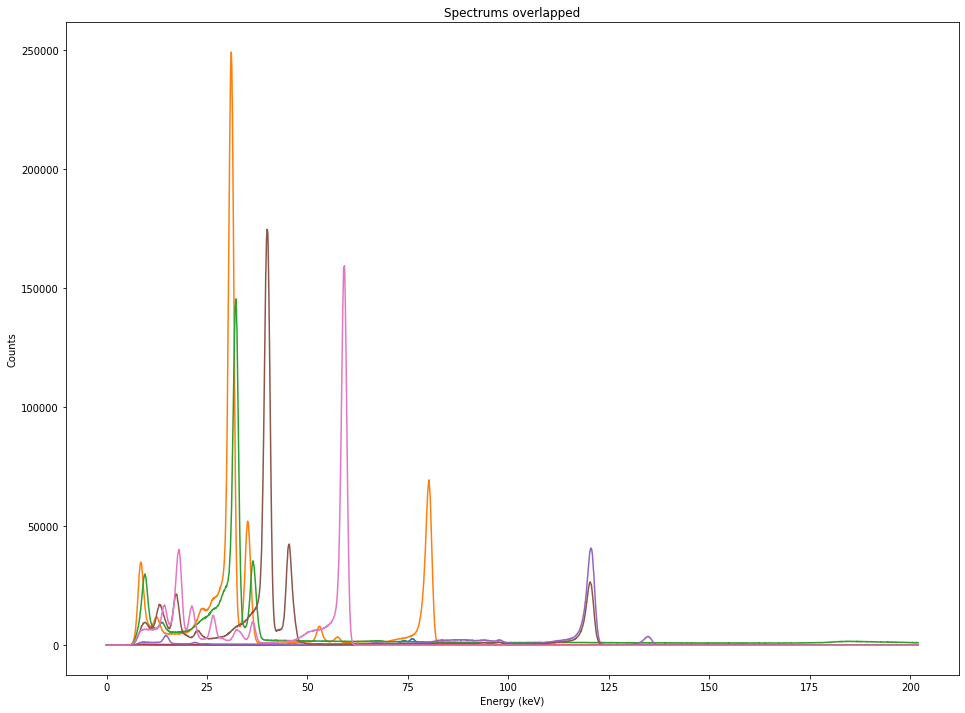

In [86]:
plots.plot_spectrums_overlapping(energies, "Spectrums overlapped")

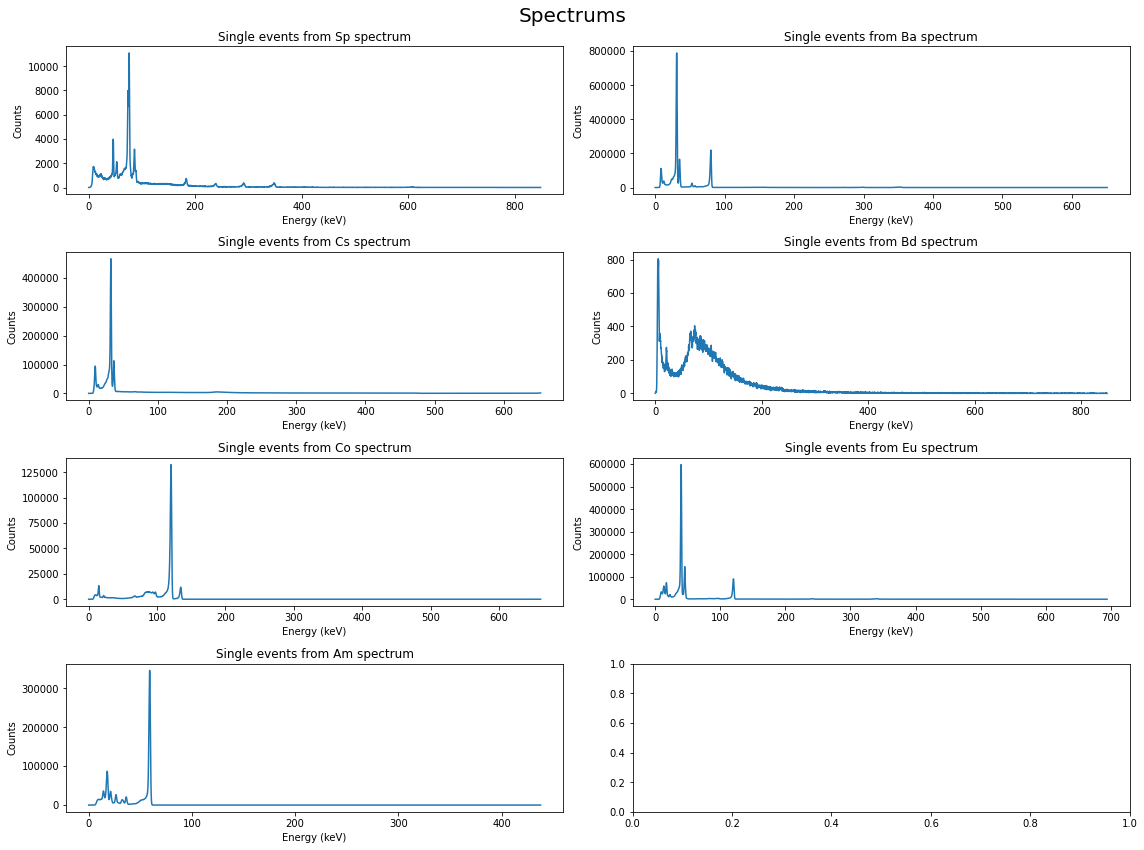

In [79]:
plots.plot_spectrums(energies, "Spectrums")

AttributeError: 'AxesSubplot' object has no attribute 'flat'

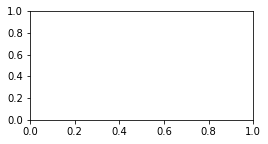

In [78]:
fig, axs = plt.subplots(figsize=(4, 2))
#line1, = axs.plot(x, y)
for key, ax in zip(energies.keys(), axs.flat):
    spectre, bins = np.histogram(energies[key],range = (0,202),bins = 3000)

    ax.plot(bins[:-1],spectre)
    ax.xlabel("Energy (keV)")
    ax.ylabel("Counts")
    ax.title("Spectre single events")

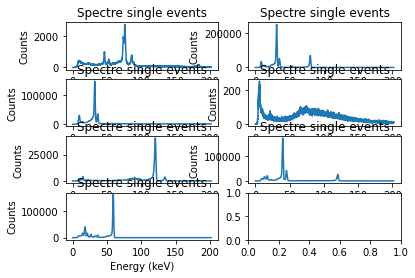

In [67]:
fig, axs = plt.subplots(nrows=4, ncols=2)
#line1, = axs.plot(x, y)
for key, ax in zip(energies.keys(), axs.flat):
    spectre, bins = np.histogram(energies[key],range = (0,300),bins = 3000)

    ax.plot(bins[:-1],spectre)
    ax.set_xlabel("Energy (keV)")
    ax.set_ylabel("Counts")
    ax.set_title("Spectre single events")

In [ ]:
spectre, bins = np.histogram(single_energy,range = (0,1000),bins = 2000)

plt.plot(bins[:-1],spectre)
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.title("Spectre single events")

ValueError: Big-endian buffer not supported on little-endian compiler

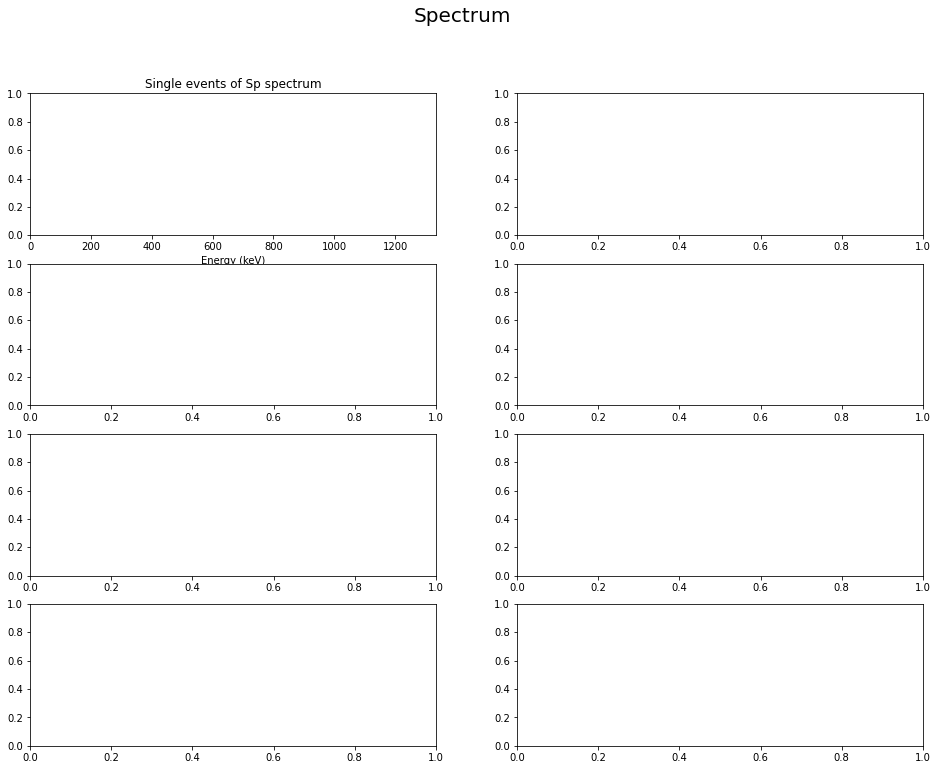

In [57]:
plots.plot_spectrum(energies, "Spectrum")

In [87]:
df_sr

,event_num,mult,mult_i,time,pixel,x,y,energy,event_type,label
0,0,1,0,0.000000,241,1,15,72.422764,1,SR
1,1,1,0,0.214265,78,14,4,76.794589,1,SR
2,2,1,0,0.257149,215,7,13,152.931080,1,SR
...,...,...,...,...,...,...,...,...,...,...
1304410,-19516,1,0,61444.001697,173,13,10,59.786638,1,SR
1304411,-19515,1,0,61444.097826,193,1,12,68.281757,1,SR
1304412,-19514,1,0,61444.112442,34,2,2,165.503362,1,SR


In [ ]:
# todos os arquivos são os dados reais, mas são pas prises pendant
# la meme condition
#Am -> Amerique
# TP8 -> configuration electronique de 1 a 15
# g0 -> outro parâmetro
# BdF -> bruit de fundo. 
# A gente seleciona
#reveil -> alarm


Text(0.5, 1.0, 'Spectre single events')

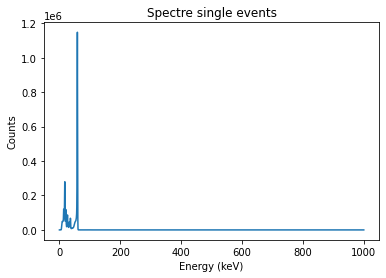

In [4]:
name = data_folder + "Am_proche_TP8_calibrated.fits"
    
hdulist = fits.open(name)

hdr = hdulist[1].header
tabdata = hdulist[1].data
    
hdulist.close()

event_num = tabdata.field("FRAME") #Numéro de l'événement
mult = tabdata.field("MULTIPLICITY") #Multiplicité (nombre de pixels touchés par l'événement)
mult_i = tabdata.field("MULT") #Numéro dans la multiplicité
time = tabdata.field("TIME") #Date de l'événement
pixel = tabdata.field("PIXEL") #Numéro du pixel touché
x = tabdata.field("X") #Coordonnée X du pixel touché
y = tabdata.field("Y") #Coordonnée Y du pixel touché
energy = tabdata.field("ENERGY") #Energie mesurée
event_type = tabdata.field("TYPE") #Ne pas s'occuper de celui-là, la colonne existe mais ne renvoie rien de pertinent

single = (mult == 1)

single_energy = energy[single]

spectre, bins = np.histogram(single_energy,range = (0,1000),bins = 2000)

plt.plot(bins[:-1],spectre)
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.title("Spectre single events")


Text(0.5, 1.0, 'Spectre single events')

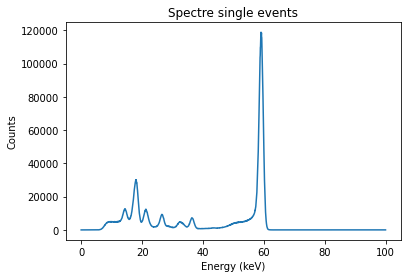

In [6]:
name = data_folder + "Am_proche_TP8_calibrated.fits"
    
hdulist = fits.open(name)

hdr = hdulist[1].header
tabdata = hdulist[1].data
    
hdulist.close()

event_num = tabdata.field("FRAME") #Numéro de l'événement
mult = tabdata.field("MULTIPLICITY") #Multiplicité (nombre de pixels touchés par l'événement)
mult_i = tabdata.field("MULT") #Numéro dans la multiplicité
time = tabdata.field("TIME") #Date de l'événement
pixel = tabdata.field("PIXEL") #Numéro du pixel touché
x = tabdata.field("X") #Coordonnée X du pixel touché
y = tabdata.field("Y") #Coordonnée Y du pixel touché
energy = tabdata.field("ENERGY") #Energie mesurée
event_type = tabdata.field("TYPE") #Ne pas s'occuper de celui-là, la colonne existe mais ne renvoie rien de pertinent

single = (mult == 1)

single_energy = energy[single]

spectre, bins = np.histogram(single_energy,range = (0,100),bins = 2000)

plt.plot(bins[:-1],spectre)
plt.xlabel("Energy (keV)")
plt.ylabel("Counts")
plt.title("Spectre single events")


In [ ]:
on reste avec la multiplicite 1, e melanja com o americium e barium
mistrurar os bagulhos e dai dizer quais que tem
pega esse espectro bonitao, melanja com o dos radioativos 

faz uma coisa parecida com o hotel unico, mistura os espectros com uma porcentagem aleatoria
identifica quais espectros eu to misturando, labeliza eles e depois bota pra treinar. Socalhe AutoMLl

In [ ]:
        # for file in files:
        #     hdulist = fits.open(self.folder+file)
        #     ans[f"{file.lower()}_header"]= hdulist[1].header
        #     ans[f"{file.lower()}_tabdata"]= hdulist[1].data
        #     hdulist.close()

        # return ans
